In [34]:
#Business understanding
print("""
Goal: Segment customers of Amazing International Airlines Inc. to identify behaviorally and economically distinct groups.
Business questions:
 - Who are the high-value frequent travelers?
 - Which groups are at risk of churn?
 - How can we personalize marketing based on income, loyalty, or travel habits?

Success criteria:
 - Segments are interpretable (demographic, behavioral, value-based)
 - Each segment supports specific business actions (targeted offers, retention strategy)
""")



Goal: Segment customers of Amazing International Airlines Inc. to identify behaviorally and economically distinct groups.
Business questions:
 - Who are the high-value frequent travelers?
 - Which groups are at risk of churn?
 - How can we personalize marketing based on income, loyalty, or travel habits?

Success criteria:
 - Segments are interpretable (demographic, behavioral, value-based)
 - Each segment supports specific business actions (targeted offers, retention strategy)



In [35]:
#2/Data understanding 

In [36]:
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [37]:
customerDB=pd.read_csv('DM_AIAI_CustomerDB.csv')
flightsDB=pd.read_csv('DM_AIAI_FlightsDB.csv')


In [38]:
customerDB.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [39]:
customerDB.shape

(16921, 21)

In [40]:
customerDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [41]:
print(customerDB.isnull().sum())


Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64


In [42]:
#from what this shows, we have a total of 16921 rows and 23 columns
#but we have somme missing values in 3 columns: 
#CancellationDate :2310 (14611 missing)
#Customer Lifetime Value:16901( 20 missing)
#Income: 16901 ( 20 missing)


In [43]:
customerDB.describe()

,Unnamed: 0,Loyalty#,Latitude,Longitude,Income,Customer Lifetime Value
count,16921.000000,16921.000000,16921.000000,16921.000000,16901.000000,16901.000000
mean,8440.023639,550197.393771,47.174500,-91.814768,37758.038400,7990.460188
std,4884.775439,259251.503597,3.307971,22.242429,30368.992499,6863.173093
min,0.000000,100011.000000,42.984924,-135.056840,0.000000,1898.010000
25%,4210.000000,326823.000000,44.231171,-120.237660,0.000000,3979.720000
50%,8440.000000,550896.000000,46.087818,-79.383186,34161.000000,5780.180000
75%,12670.000000,772438.000000,49.282730,-74.596184,62396.000000,8945.690000
max,16900.000000,999999.000000,60.721188,-52.712578,99981.000000,83325.380000


In [44]:
len(customerDB)

16921

In [45]:
customerDB.columns.values[0] = "ID"
customerDB.columns.values[1] = "loyalty"

In [46]:
customerDB.head()

,ID,loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [47]:
print(customerDB.dtypes)

ID                           int64
loyalty                      int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object


In [48]:
#From this function , we can see that we have 3 types in our customer table : integer,float and object 

In [49]:
#Now we want to explore why we have these missing values in income, cancellation date and customer Lifetime Value

In [50]:
cols_to_check = ["CancellationDate", "Customer Lifetime Value", "Income"]
missing_rows = customerDB[customerDB[cols_to_check].isnull().any(axis=1)]
print(missing_rows)


       ID  loyalty First Name    Last Name        Customer Name Country  \
0       0   480934    Cecilia  Householder  Cecilia Householder  Canada   
1       1   549612      Dayle        Menez          Dayle Menez  Canada   
3       3   608370      Queen        Hagee          Queen Hagee  Canada   
4       4   530508     Claire      Latting       Claire Latting  Canada   
5       5   193662   Leatrice       Hanlin      Leatrice Hanlin  Canada   
...    ..      ...        ...          ...                  ...     ...   
16916  15   100012      Ethan     Thompson       Ethan Thompson  Canada   
16917  16   100013      Layla        Young          Layla Young  Canada   
16918  17   100014     Amelia      Bennett       Amelia Bennett  Canada   
16919  18   100015   Benjamin       Wilson      Benjamin Wilson  Canada   
16920  19   100016       Emma       Martin          Emma Martin  Canada   

      Province or State          City   Latitude   Longitude  ...  Gender  \
0               Ontari

In [51]:
# CancellationDate column:
# Missingness: Not random
# Reason: Customer never cancelled : meaningful
# Treatment: No imputation needed

# Customer Lifetime Value column:
# Missingness: Not random
# Reason: seems to be new customers with no history
# Treatment: Could impute with mean/median or predictive model or let 

# Income column:
# Missingness: Random
# Reason: Customer did not provide or data not collected
# Treatment: Can impute with median or regression model or let 

In [60]:
# 1. Count unique vs total
print("Total rows:", len(customerDB))
print("Unique Loyalty#:", customerDB['Loyalty#'].nunique())

# 2. See which IDs are repeated
duplicates = customerDB[customerDB['Loyalty#'].duplicated(keep=False)]
print(duplicates.sort_values('Loyalty#'))

# 3. Check if duplicates have same or different info
duplicates.groupby('Loyalty#').agg({'EnrollmentDateOpening':'nunique', 'CancellationDate':'nunique', 'LoyaltyStatus':'nunique'})


Total rows: 16921
Unique Loyalty#: 16757
          ID  loyalty First Name    Last Name     Customer Name Country  \
1646    1646   101902       Hans  Schlottmann  Hans Schlottmann  Canada   
2668    2668   101902         Yi        Nesti          Yi Nesti  Canada   
15988  15988   106001     Maudie       Hyland     Maudie Hyland  Canada   
700      700   106001     Ivette       Peifer     Ivette Peifer  Canada   
13053  13053   106509      Stacy     Schwebke    Stacy Schwebke  Canada   
...      ...      ...        ...          ...               ...     ...   
5038    5038   989528     Sharri     Boughman   Sharri Boughman  Canada   
9890    9890   990512      Magda       Sopher      Magda Sopher  Canada   
14478  14478   990512       Ione      Snowden      Ione Snowden  Canada   
6981    6981   992168  Frederick       Samaha  Frederick Samaha  Canada   
16380  16380   992168     Crysta       Bennin     Crysta Bennin  Canada   

      Province or State         City   Latitude   Longitud

,EnrollmentDateOpening,CancellationDate,LoyaltyStatus
loyalty,,,
101902,2,0,1
106001,2,0,1
106509,2,1,2
112142,2,1,2
114414,2,0,2
...,...,...,...
981508,2,0,2
988392,2,0,2
989528,2,0,2


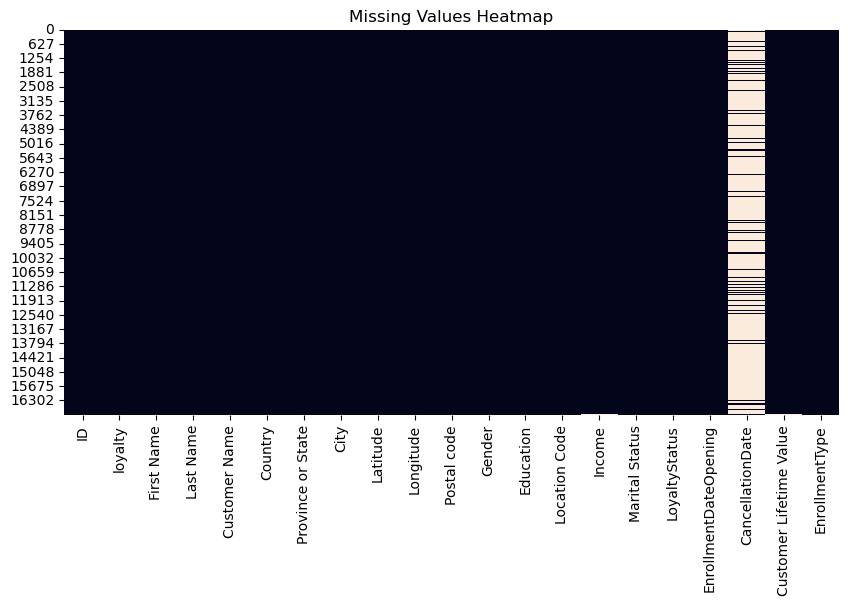

In [52]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(customerDB.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [53]:
#visualization 

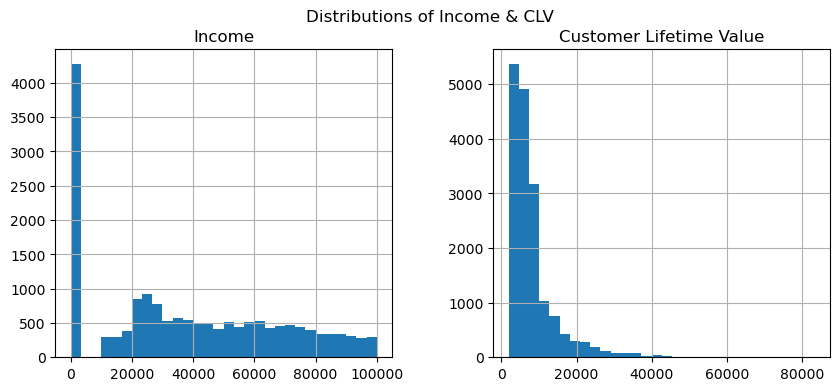

In [54]:
numeric_cols = ['Income', 'Customer Lifetime Value']
customerDB[numeric_cols].hist(bins=30, figsize=(10,4))
plt.suptitle("Distributions of Income & CLV")
plt.show()


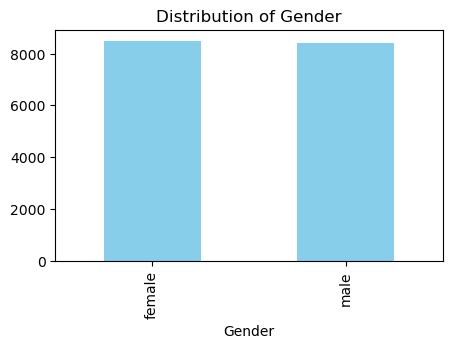

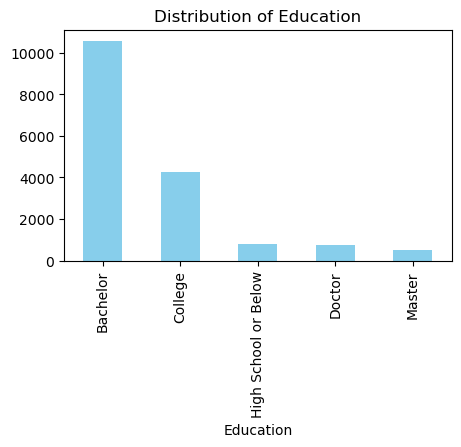

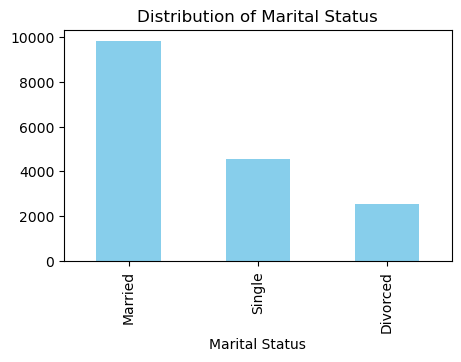

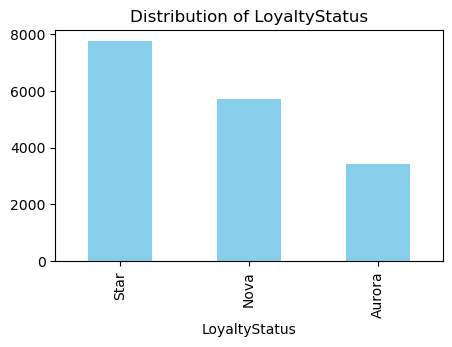

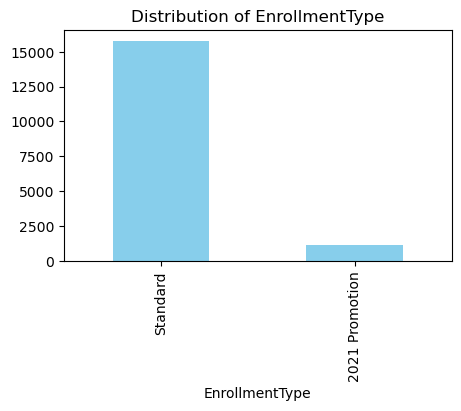

In [55]:
cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus','EnrollmentType']
for col in cat_cols:
    plt.figure(figsize=(5,3))
    customerDB[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

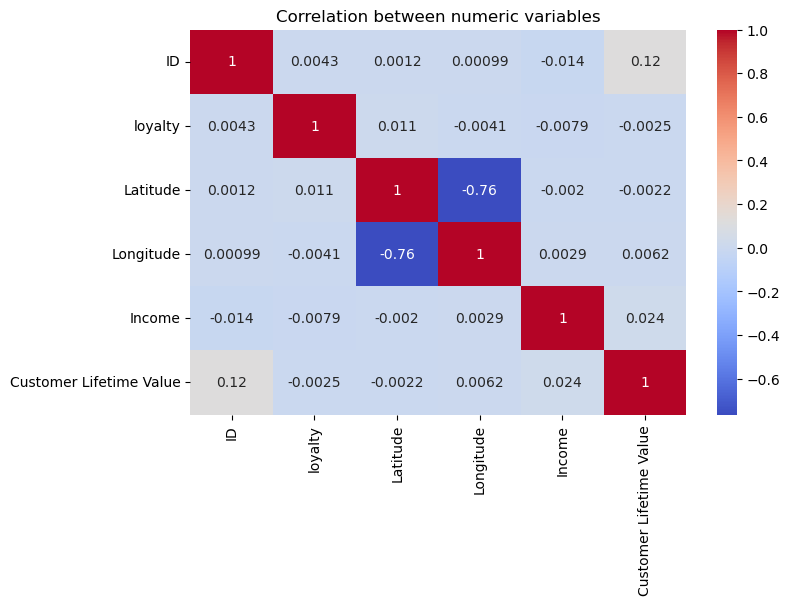

In [59]:
plt.figure(figsize=(8,5))
sns.heatmap(customerDB.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between numeric variables")
plt.show()


In [56]:
#Correlation between variables

In [57]:
#Uniques and duplicates

In [58]:
#3/ data preparation